## Часть 1. Общие задачи по Python
### 1.1.Преобразовать JSON-файл в CSV-файл

In [1]:
import json
import csv
with open('sales.json', 'r') as jsonFile, open('sales.csv', 'w', newline = '') as csvFile:
    jsonReader = json.load(jsonFile)
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['item','country','year','sales'])
    for item in jsonReader:
        for country in item["sales_by_country"]:
            for year in item ["sales_by_country"][country].items():
                csvWriter.writerow([item["item"], country, year[0],year[1]])

### 1.2 Выкачать информацию по курсам валют используя REST-API. Визуализировать на графике и сохранить.

In [2]:
import requests
import datetime
import xml

In [3]:
currDate = datetime.datetime.today().strftime('%d/%m/%Y')
print(currDate)

28/11/2021


**Запрос Долларов**

In [4]:
req = requests.get(f'http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={currDate}&VAL_NM_RQ=R01235')
with open('usd.xml', 'w') as file:
    file.write(req.text)

**Запрос Евро**

In [5]:
req = requests.get(f'http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={currDate}&VAL_NM_RQ=R01239')
with open('euro.xml', 'w') as file:
    file.write(req.text)

**Запрос Японской иены**

In [6]:
req = requests.get(f'http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={currDate}&VAL_NM_RQ=R01820')
with open('uena.xml', 'w') as file:
    file.write(req.text)

**Запрос Украинской гривны**

In [7]:
req = requests.get(f'http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={currDate}&VAL_NM_RQ=R01720')
with open('grivna.xml', 'w') as file:
    file.write(req.text)

**Парсинг xml и создание csv**

In [8]:
Date = []
doc = xml.dom.minidom.parse('usd.xml')
usdTree = doc.getElementsByTagName('Record')
usdValue = []
for elem in usdTree:
    Date.append(datetime.datetime.strptime(elem.getAttribute('Date'),'%d.%m.%Y').date())
    val = float(elem.getElementsByTagName('Value')[0].firstChild.nodeValue.replace(',','.',-1))
    nom = float(elem.getElementsByTagName('Nominal')[0].firstChild.nodeValue)
    usdValue.append(val/nom)

In [9]:
doc = xml.dom.minidom.parse('euro.xml')
euroTree = doc.getElementsByTagName('Record')
euroValue = []
for elem in euroTree:
    val = float(elem.getElementsByTagName('Value')[0].firstChild.nodeValue.replace(',','.',-1))
    nom = float(elem.getElementsByTagName('Nominal')[0].firstChild.nodeValue)
    euroValue.append(val/nom)

In [10]:
doc = xml.dom.minidom.parse('uena.xml')
uenaTree = doc.getElementsByTagName('Record')
uenaValue = []
for elem in uenaTree:
    val = float(elem.getElementsByTagName('Value')[0].firstChild.nodeValue.replace(',','.',-1))
    nom = float(elem.getElementsByTagName('Nominal')[0].firstChild.nodeValue)
    uenaValue.append(val/nom)

In [11]:
doc = xml.dom.minidom.parse('grivna.xml')
grivnaTree = doc.getElementsByTagName('Record')
grivnaValue = []
for elem in grivnaTree:
    val = float(elem.getElementsByTagName('Value')[0].firstChild.nodeValue.replace(',','.',-1))
    nom = float(elem.getElementsByTagName('Nominal')[0].firstChild.nodeValue)
    grivnaValue.append(val/nom)

In [12]:
with open('courses.csv', 'w', newline = '') as csvFile:
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['date','usd','eu','yen','uah'])
    for i in range(len(Date)):
        csvWriter.writerow([Date[i], usdValue[i], euroValue[i], uenaValue[i],grivnaValue[i]])

**Отрисовка полученных данных**

In [13]:
import matplotlib.pyplot as plt

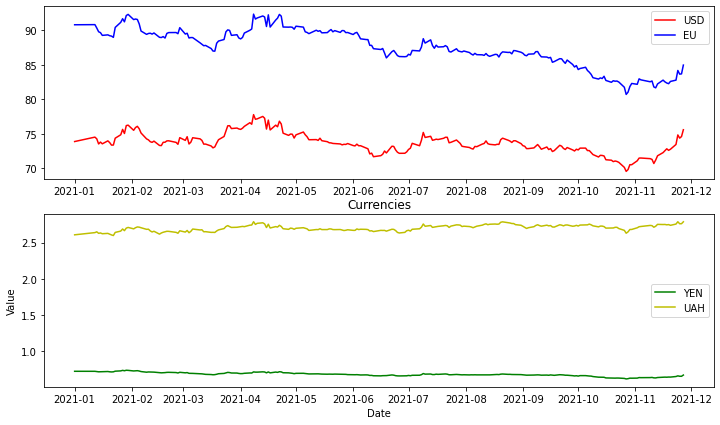

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7))
axes[0].plot(Date, usdValue, '-r')
axes[0].plot(Date, euroValue, '-b')
axes[0].legend(['USD','EU'])
axes[1].plot(Date, uenaValue, '-g', label='YEN')
axes[1].plot(Date, grivnaValue, '-y', label='UAH')
axes[1].legend(['YEN','UAH'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Currencies')
plt.legend()
plt.show()

# 2. Общие задачи по Numpy & matplotlib
### 2.1 Вычислить функцию:
### $$f(\stackrel\rightarrow x, \stackrel\rightarrow \omega, b) = \stackrel\rightarrow x\cdot\stackrel\rightarrow \omega + b = \sum\limits_{i=1}^n \omega_i x_i + b$$

In [15]:
import numpy as np

In [16]:
def f (vecX, vecW, b):
    if (len(vecX)!=len(vecW)):
        print('Длины векторов не равны!')
        return 0
    vecXW = vecX * vecW
    return vecXW.sum()+b

In [17]:
x = np.fromstring(input("Input X: "), dtype=int, sep=' ')
w = np.fromstring(input("Input W: "), dtype=int, sep=' ')
b = float(input("Input b: "))

print("Result: ", f(x, w, b), '\n')

Input X: 1 2 3
Input W: 2 2 2
Input b: 5
Result:  17.0 



### 2.2 На отрезке [-5;5] построить графики функций:
### $$f(x)=x-\frac{x^3}{6}+\frac{x^5}{120}-\frac{x^7}{5040}$$
### $$g(x)=\sin (x)$$

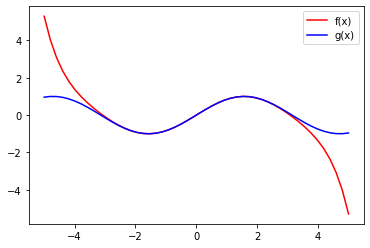

In [18]:
x = np.linspace(-5,5)
f = x - x**3/6 + x**5/120 - x**7/5040
g = np.sin(x)
plt.plot(x,f,'r',label = 'f(x)')
plt.plot(x,g,'b',label = 'g(x)')
plt.legend()
plt.show()

### 2.3 Нарисовать в matplotlib окружность заданного радиуса r.

Input r: 6


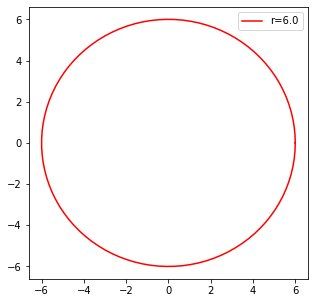

In [19]:
r = float(input('Input r: '))
t = np.linspace(0,np.pi*2,100)
plt.figure(figsize=(5,5))
plt.plot(np.cos(t)*r,np.sin(t)*r,'r',label = f'r={r}')
plt.legend()
plt.show()

### 2.4 Написать функцию transformation_plot, принимающую на вход набор двумерных точек и квадратную матрицу размером 2x2. 
Отрисуйте на одном графике оригинальные точки, на втором - точки после преобразования при помощи матрицы. Отобразите точки таким образом, чтобы было понятно, какая из точек на первом графике соответствует какой точке на втором.

In [20]:
def transformation_plot(x,matrix):
    result = np.empty((countOfDots,2))
    for i in range(countOfDots):
        result[i,0] = x[i, 0]*matrix[0, 0] + x[i, 1]*matrix[1, 0]
        result[i,1] = x[i, 0]*matrix[0, 1] + x[i, 1]*matrix[1, 1]
    return result

Input count of dots: 13
Input the matrix...
2 5
3 5


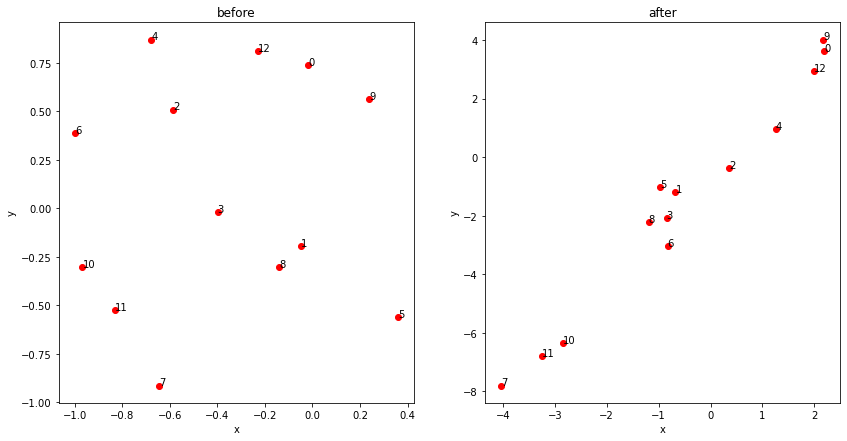

In [27]:
countOfDots = int(input("Input count of dots: "))
matrix = np.empty((2,2))
x = np.random.uniform(low=-1, high=1, size=(countOfDots,2))
print("Input the matrix...")
for i in range(2):
    matrix[i] = np.fromstring(input(), dtype=float, sep=' ')
new_x = transformation_plot(x,matrix)


fig, axes = plt.subplots(1,2,figsize=(14, 7))
for i in range(countOfDots):
    axes[0].plot(x[i,0],x[i,1], "ro")
    axes[0].text(x[i,0], x[i,1], f'{i}')
    axes[1].plot(new_x[i,0],new_x[i,1], "ro")
    axes[1].text(new_x[i,0], new_x[i,1], f'{i}')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('before')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('after')

plt.show()

### 2.5 Задайте некоторую функцию одной переменной f(x) (пример: sin(x), ln(x), x**2 + 2x + 1, …):
Отрисуйте график её производной на выбранном интервале [a,b], не используя её аналитическое выражение.
Сравните для проверки с аналитическим выражением производной.

In [22]:
def df(x):
    dx = 1e-5
    return (np.log(x+dx)-np.log(x))/dx

Input left border: 1
Input right border: 10


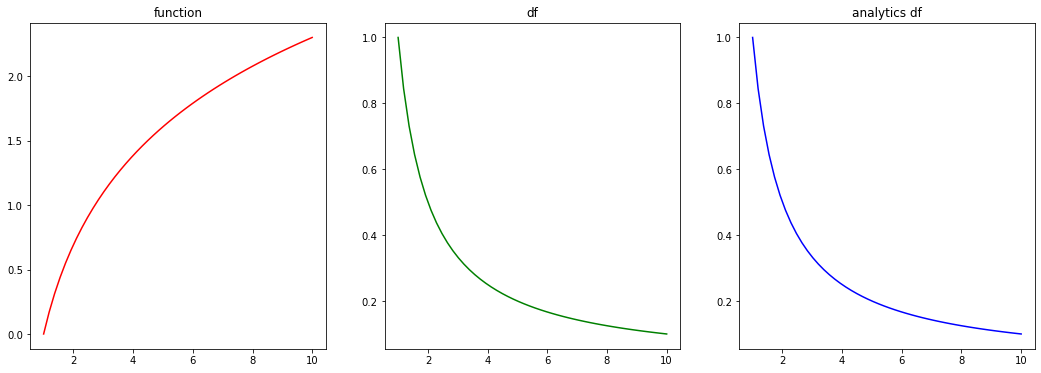

In [23]:
a = float(input('Input left border: '))
b = float(input('Input right border: '))
x = np.linspace(a,b)


fig, axes = plt.subplots(1,3,figsize=(18,6))
axes[0].plot(x,np.log(x),'r')
axes[1].plot(x,df(x),'g')
axes[2].plot(x,1/x,'b')

axes[0].set_title('function')
axes[1].set_title('df')
axes[2].set_title('analytics df')
plt.show()

### 2.6 Дано множество векторов V размерности d. Дан вектор q такой же размерности.
Определить:\
а) Пропорцию векторов v в V, для которых угол(v,q) < 90 градусов \
б) Пропорцию векторов v в V, для которых угол(v,q) < 30 градусов 


In [24]:
sizeV = int(input('Input size of V: '))
d = int(input('Input dimension: '))

quantityV = np.random.uniform(low=-20, high=20, size=(sizeV,d))
q = np.random.uniform(low=-20, high=20, size=d)

#print('q =',q)
res_90 = 0
res_30 = 0
q = q/np.linalg.norm(q)
for v in quantityV:
    v1 = v/np.linalg.norm(v)
    angle = np.arccos(np.clip(np.dot(v1,q),-1.0,1.0))*180/np.pi
    #print(v,'angle =', angle)
    if(angle < 90):
        res_90 += 1
    if(angle < 30):
        res_30 += 1

print('a) Proportion angle<90 =', res_90/sizeV)
print('b) Proportion angle<30 =', res_30/sizeV)

Input size of V: 50
Input dimension: 3
a) Proportion angle<90 = 0.48
b) Proportion angle<30 = 0.04


### 7. Дан гиперкуб и вписанная в него гиперсфера. 
Через сэмплинг точек внутри гиперкуба, оценить отношение объёма гиперсферы к объёму гиперкуба. Вывести график этой пропорции в зависимости от размерности пространства d.

Input dimension: 3
Input total_points: 200

total_points   200
points_inside  112
fraction 0.56


 We do not know how to show a dimension greater than 2, so we show everything on a 2D graph.


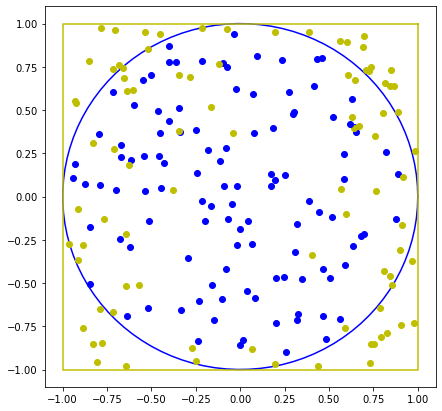

In [25]:
d = 0
while (d<2):
    d = int(input('Input dimension: '))

total_points = int(input('Input total_points: '))

dots = np.random.uniform(low=-1, high=1, size=(total_points,d))
square =[[1,1,-1,-1,1],[1,-1,-1,1,1]]
points_inside = 0    
t = np.linspace(0,np.pi*2,100)
plt.figure(figsize=(7,7))
plt.plot(np.cos(t),np.sin(t),'b')
plt.plot(square[0],square[1],'-y')
for dot in dots:
    if (np.linalg.norm(dot) <= 1):
        plt.plot(dot[0],dot[1],'bo')
        points_inside += 1
    else:
        plt.plot(dot[0],dot[1],'yo')

print('\ntotal_points  ', total_points)
print('points_inside ', points_inside)
print('fraction', points_inside/total_points)
if (d > 2):
    print('\n\n We do not know how to show a dimension greater than 2, so we show everything on a 2D graph.')
plt.show()